In [1]:
#Replace yamg, aja,so
import csv
with open('result/result_rawBOW_appstore.csv', 'r', encoding="utf8") as nodecsv: # Buka file                       
    csvreader = csv.reader(nodecsv) # membaca data
    # Menyusun data dalam list dan menghilangkan header data
    words = [n for n in csvreader]

In [2]:
words

[['ni',
  'aplikasi',
  'ngeblokir',
  'akses',
  'masuk',
  'gapernah',
  'salah',
  'password',
  'masuk',
  'nyuruh',
  'rutin',
  'ganti',
  'password',
  'fair',
  'olah',
  'salah',
  'password',
  'blokir',
  'suruh',
  'ganti',
  'password',
  'kali',
  'blokir',
  'paksa',
  'suruh',
  'ganti',
  'password',
  'gobl'],
 ['aplikasi',
  'eror',
  'pas',
  'log',
  'in',
  'log',
  'out',
  'buka',
  'menu',
  'kadang',
  'no',
  'rek',
  'orang',
  'daftar',
  'riwayat',
  'parah',
  'kelas',
  'bumn',
  'layan',
  'gin'],
 ['buruk', 'banget', 'pake', 'token', 'ribet'],
 ['sukses',
  'baru',
  'pasword',
  'pas',
  'login',
  'gak',
  'trus',
  'pasword',
  'id',
  'user',
  'terbelokir',
  'kali',
  'login'],
 ['heran',
  'deh',
  'suka',
  'blokir',
  'udh',
  'bener',
  'masuk',
  'udh',
  'langsung',
  'blokir',
  'gak',
  'udh'],
 ['lot', 'bikin', 'emosi', 'aja', 'simple', 'aja', 'eror', 'mulu'],
 ['tampil', 'fresh', 'versi', 'aplikasi', 'user', 'id', 'blokir'],
 ['download

In [3]:
#bag of words
import gensim
dictionary = gensim.corpora.Dictionary(words)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 akses
1 aplikasi
2 blokir
3 fair
4 ganti
5 gapernah
6 gobl
7 kali
8 masuk
9 ngeblokir
10 ni


In [4]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [5]:
bow_corpus = [dictionary.doc2bow(doc) for doc in words]
bow_corpus

[[(0, 1), (1, 2), (2, 1), (3, 2), (4, 5), (5, 2), (6, 2)],
 [(0, 1), (7, 1), (8, 1), (9, 2)],
 [(10, 1)],
 [(2, 1), (11, 1), (12, 1), (13, 2)],
 [(1, 2), (3, 1), (12, 1)],
 [(14, 2)],
 [(0, 1), (1, 1)],
 [(0, 2), (3, 1), (13, 1), (15, 1), (16, 1)],
 [(0, 2), (1, 1), (4, 1), (10, 1)],
 [(17, 1), (18, 1)],
 [(1, 1), (2, 1), (13, 1), (19, 1), (20, 1)],
 [(2, 2), (13, 1), (21, 1), (22, 1)],
 [(19, 1), (20, 1), (23, 1), (24, 1)],
 [(1, 1), (13, 1), (24, 2), (25, 1)],
 [(4, 1)],
 [(0, 1), (2, 1), (7, 1), (8, 1), (9, 1), (17, 1), (18, 1), (21, 1)],
 [(17, 1), (26, 1)],
 [(14, 1), (15, 1), (17, 1), (18, 1)],
 [(13, 1)],
 [(0, 1), (13, 1), (14, 1), (17, 1), (18, 1), (19, 1), (27, 1)],
 [(8, 1), (9, 1), (19, 1), (23, 1), (26, 1), (28, 1)],
 [(1, 1), (5, 1), (13, 1), (17, 2), (18, 2), (26, 1)],
 [(0, 1)],
 [(1, 1), (4, 1), (5, 1), (13, 1)],
 [(14, 1), (17, 1), (18, 1), (20, 2), (29, 1), (30, 1)],
 [(14, 1), (22, 1)],
 [(0, 3), (14, 1), (28, 1)],
 [(26, 1)],
 [(3, 1), (11, 1), (13, 2), (16, 1), (2

In [6]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

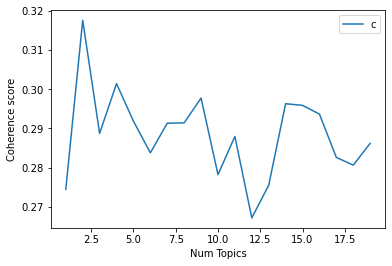

Num Topics = 1  has Coherence Value of 0.274495
Num Topics = 2  has Coherence Value of 0.317582
Num Topics = 3  has Coherence Value of 0.288752
Num Topics = 4  has Coherence Value of 0.301429
Num Topics = 5  has Coherence Value of 0.291878
Num Topics = 6  has Coherence Value of 0.283802
Num Topics = 7  has Coherence Value of 0.291343
Num Topics = 8  has Coherence Value of 0.291436
Num Topics = 9  has Coherence Value of 0.297753
Num Topics = 10  has Coherence Value of 0.278256
Num Topics = 11  has Coherence Value of 0.287979
Num Topics = 12  has Coherence Value of 0.267214
Num Topics = 13  has Coherence Value of 0.275537
Num Topics = 14  has Coherence Value of 0.296315
Num Topics = 15  has Coherence Value of 0.295894
Num Topics = 16  has Coherence Value of 0.293668
Num Topics = 17  has Coherence Value of 0.282631
Num Topics = 18  has Coherence Value of 0.280662
Num Topics = 19  has Coherence Value of 0.286215


In [7]:
start=1
limit=20
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=bow_corpus,texts=words, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

In [8]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=2,id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.080*"sms" + 0.073*"login" + 0.069*"masuk" + 0.063*"aplikasi" + 0.063*"gak" + 0.049*"link" + 0.047*"update" + 0.044*"kali" + 0.043*"kirim" + 0.042*"brimo"
Topic: 1 
Words: 0.125*"login" + 0.058*"yg" + 0.052*"password" + 0.050*"blokir" + 0.049*"baik" + 0.047*"koneksi" + 0.042*"update" + 0.041*"mohon" + 0.040*"putus" + 0.035*"brimo"
